<a href="https://colab.research.google.com/github/koech-Alex/Grid-Pathfinding-with-Diagonal-Movement-Using-GBFS-and-Visualization/blob/main/AI_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

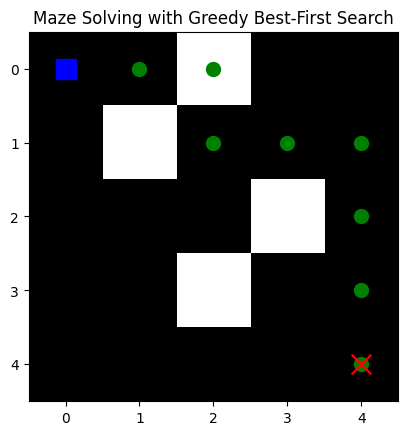

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def manhattan_distance(node, goal):
    """Calculates the Manhattan distance between two nodes."""
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def greedy_best_first_search(maze, start, goal):
    """Solves the maze using Greedy Best-First Search."""
    rows, cols = len(maze), len(maze[0])
    visited = set()
    heap = [(0, start)]  # (heuristic, node)
    parent = {}  # To reconstruct the path

    while heap:
        _, current = heapq.heappop(heap)
        if current == goal:
            return reconstruct_path(parent, start, goal)

        visited.add(current)

        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if neighbor not in visited and 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and maze[neighbor[0]][neighbor[1]] == 0:
                heapq.heappush(heap, (manhattan_distance(neighbor, goal), neighbor))
                parent[neighbor] = current

    return None  # No path found

def reconstruct_path(parent, start, goal):
    """Reconstructs the path from start to goal."""
    path = [goal]
    current = goal
    while current != start:
        current = parent[current]
        path.append(current)
    path.reverse()
    return path

def visualize_maze(maze, path, start, goal):
    """Visualizes the maze, path, and explored nodes."""
    plt.imshow(maze, cmap='gray', interpolation='nearest')
    plt.scatter(*zip(*path), color='green', marker='o', s=100)
    plt.scatter(start[0], start[1], color='blue', marker='s', s=200)
    plt.scatter(goal[0], goal[1], color='red', marker='x', s=200)
    plt.title("Maze Solving with Greedy Best-First Search")
    plt.show()

# Example usage
maze = [[0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0]]
start = (0, 0)
goal = (4, 4)

path = greedy_best_first_search(maze, start, goal)
if path:
    visualize_maze(maze, path, start, goal)
else:
    print("No path found.")

QUESTION 4

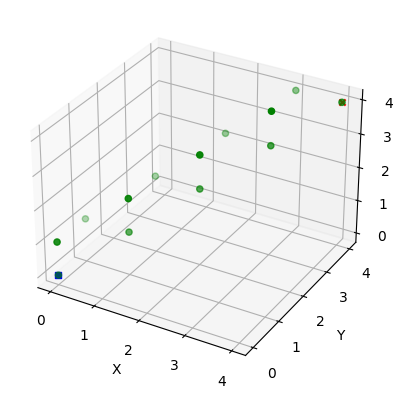

In [ ]:
import heapq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def euclidean_distance(point1, point2):
    """Calculates the Euclidean distance between two points."""
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2) ** 0.5

def greedy_best_first_search(grid, start, goal):
    """Solves the 3D pathfinding problem using Greedy Best-First Search."""
    rows, cols, depth = grid.shape
    visited = set()
    heap = [(0, start)]  # (heuristic, point)
    parent = {}  # To reconstruct the path
    directions = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (-1, 0, 0), (0, -1, 0), (0, 0, -1)]

    while heap:
        _, current = heapq.heappop(heap)
        if current == goal:
            return reconstruct_path(parent, start, goal)

        visited.add(current)

        for dx, dy, dz in directions:
            neighbor = (current[0] + dx, current[1] + dy, current[2] + dz)
            if neighbor not in visited and 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and 0 <= neighbor[2] < depth and grid[neighbor[0]][neighbor[1]][neighbor[2]] == 0:
                heapq.heappush(heap, (euclidean_distance(neighbor, goal), neighbor))
                parent[neighbor] = current

    return None  # No path found

def reconstruct_path(parent, start, goal):
    """Reconstructs the path from start to goal."""
    path = [goal]
    current = goal
    while current != start:
        current = parent[current]
        path.append(current)
    path.reverse()
    return path

def visualize_3d_environment(grid, path, start, goal):
    """Visualizes the 3D environment, path, and explored nodes."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = zip(*path)
    ax.scatter(x, y, z, color='green', marker='o')
    ax.scatter(*start, color='blue', marker='s')
    ax.scatter(*goal, color='red', marker='x')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Example usage
grid = np.zeros((5, 5, 5))
grid[2, 2, 1] = 1  # Obstacle
start = (0, 0, 0)
goal = (4, 4, 4)

path = greedy_best_first_search(grid, start, goal)
if path:
    visualize_3d_environment(grid, path, start, goal)
else:
    print("No path found.")

question 3

In [ ]:
def print_board(board):
    """Prints the current state of the Tic-Tac-Toe board."""
    for row in board:
        print(" | ".join(row))
        print("-" * 9)

def check_winner(board):
    """Checks if there's a winner or a tie."""
    # Check rows
    for row in board:
        if row[0] == row[1] == row[2] and row[0] != " ":
            return row[0]
    # Check columns
    for col in range(3):
        if board[0][col] == board[1][col] == board[2][col] and board[0][col] != " ":
            return board[0][col]
    # Check diagonals
    if board[0][0] == board[1][1] == board[2][2] and board[0][0] != " ":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] and board[0][2] != " ":
        return board[0][2]
    # Check for tie
    if all(all(cell != " " for cell in row) for row in board):
        return "Tie"
    return None

def play_tic_tac_toe():
    """Main game loop."""
    board = [[" ", " ", " "], [" ", " ", " "], [" ", " ", " "]]
    current_player = "X"
    while True:
        print_board(board)
        row = int(input(f"Player {current_player}, enter row (0-2): "))
        col = int(input(f"Player {current_player}, enter column (0-2): "))
        if not (0 <= row < 3 and 0 <= col < 3) or board[row][col] != " ":
            print("Invalid move. Please try again.")
            continue
        board[row][col] = current_player
        winner = check_winner(board)
        if winner:
            print_board(board)
            print(f"Player {winner} wins!")
            break
        current_player = "O" if current_player == "X" else "X"

if __name__ == "__main__":
    play_tic_tac_toe()

  |   |  
---------
  |   |  
---------
  |   |  
---------
Player X, enter row (0-2): 2
Player X, enter column (0-2): 1
  |   |  
---------
  |   |  
---------
  | X |  
---------
Player O, enter row (0-2): 2
Player O, enter column (0-2): 0
  |   |  
---------
  |   |  
---------
O | X |  
---------
Player X, enter row (0-2): 2
Player X, enter column (0-2): 1
Invalid move. Please try again.
  |   |  
---------
  |   |  
---------
O | X |  
---------
Player X, enter row (0-2): 2
Player X, enter column (0-2): 0
Invalid move. Please try again.
  |   |  
---------
  |   |  
---------
O | X |  
---------
Player X, enter row (0-2): 1
Player X, enter column (0-2): 1
  |   |  
---------
  | X |  
---------
O | X |  
---------
Player O, enter row (0-2): 2
Player O, enter column (0-2): 1
Invalid move. Please try again.
  |   |  
---------
  | X |  
---------
O | X |  
---------
Player O, enter row (0-2): 0
Player O, enter column (0-2): 0
O |   |  
---------
  | X |  
---------
O | X |  
-------

question 4

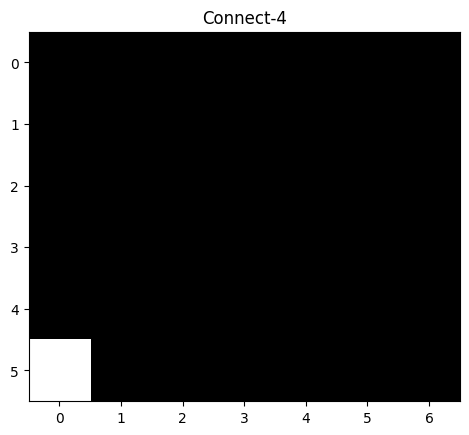

Enter column (0-6): 0


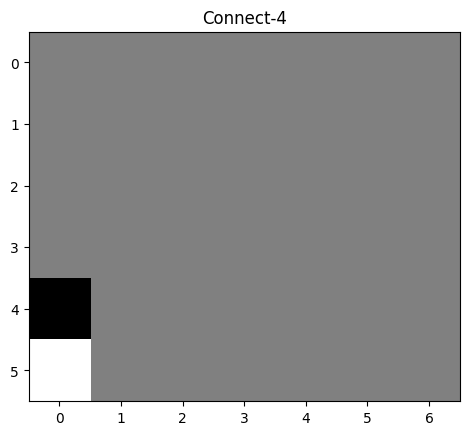

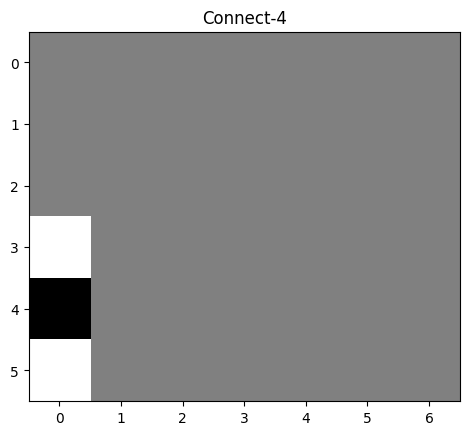

Enter column (0-6): 1


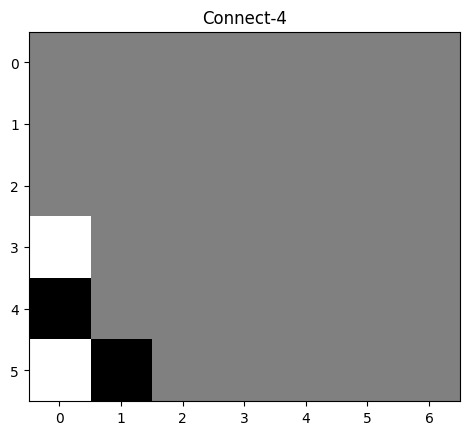

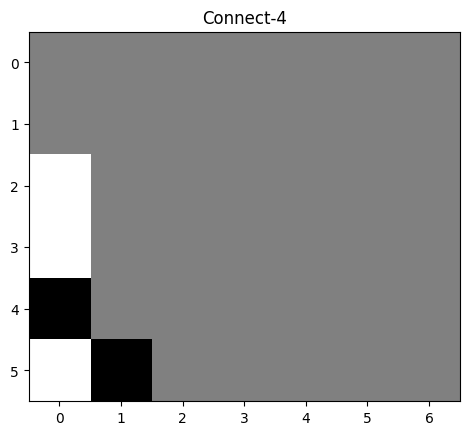

Enter column (0-6): 2


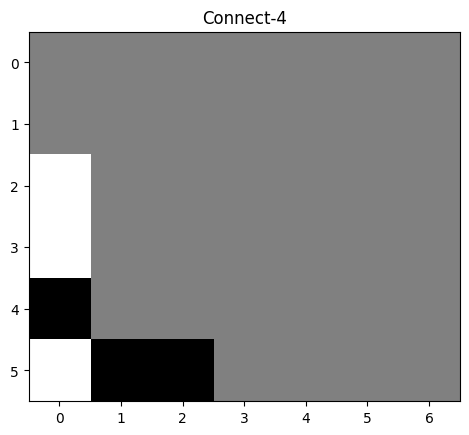

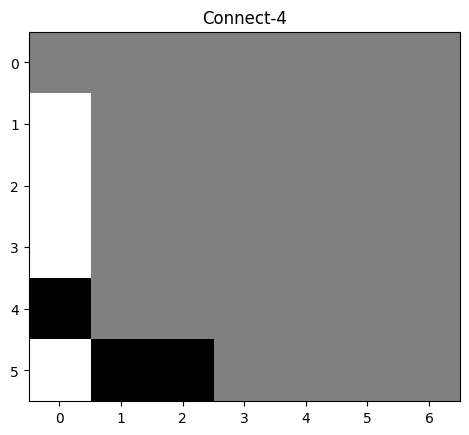

Enter column (0-6): 3


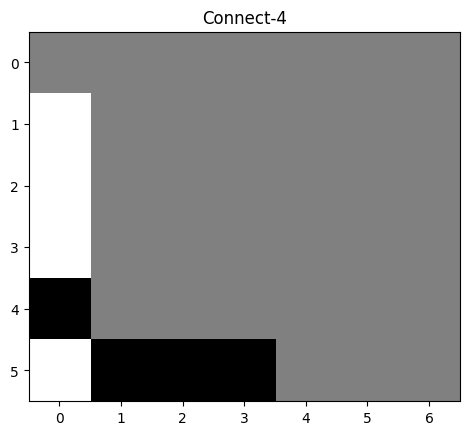

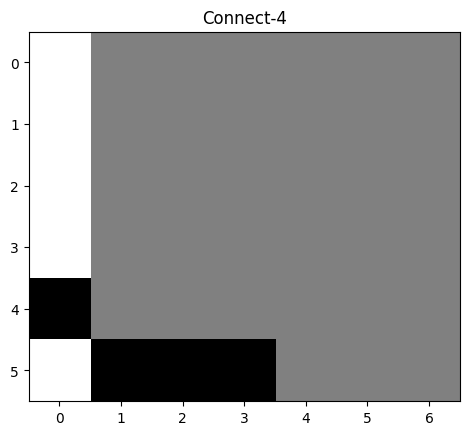

AI wins!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_board(board):
    """Evaluates the board for a win, loss, or tie."""
    for row in range(6):
        for col in range(4):
            if board[row][col] == board[row][col + 1] == board[row][col + 2] == board[row][col + 3] and board[row][col] != 0:
                return board[row][col] * 10
    for row in range(3):
        for col in range(7):
            if board[row][col] == board[row + 1][col] == board[row + 2][col] == board[row + 3][col] and board[row][col] != 0:
                return board[row][col] * 10
    for row in range(3):
        for col in range(4):
            if board[row][col] == board[row + 1][col + 1] == board[row + 2][col + 2] == board[row + 3][col + 3] and board[row][col] != 0:
                return board[row][col] * 10
    for row in range(3):
        for col in range(3):
            if board[row][col] == board[row + 1][col + 1] == board[row + 2][col + 2] == board[row + 3][col + 3] and board[row][col] != 0:
                return board[row][col] * 10
    return 0

def minimax(board, depth, maximizing_player, alpha, beta):
    """Implements the Minimax algorithm with Alpha-Beta Pruning."""
    if depth == 0 or evaluate_board(board) != 0:
        return evaluate_board(board)

    if maximizing_player:
        max_eval = -float('inf')
        for col in range(7):
            if board[0][col] == 0:
                row = next_available_row(board, col)
                board[row][col] = 1
                eval = minimax(board, depth - 1, False, alpha, beta)
                board[row][col] = 0
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break  # Pruning
        return max_eval
    else:
        min_eval = float('inf')
        for col in range(7):
            if board[0][col] == 0:
                row = next_available_row(board, col)
                board[row][col] = -1
                eval = minimax(board, depth - 1, True, alpha, beta)
                board[row][col] = 0
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:
                    break  # Pruning
        return min_eval

def find_best_move(board):
    """Finds the best move for the AI using Minimax with Alpha-Beta Pruning."""
    best_move = None
    best_eval = -float('inf')
    for col in range(7):
        if board[0][col] == 0:
            row = next_available_row(board, col)
            board[row][col] = 1
            eval = minimax(board, 3, False, -float('inf'), float('inf'))
            board[row][col] = 0
            if eval > best_eval:
                best_eval = eval
                best_move = col
    return best_move

def next_available_row(board, col):
    """Finds the next available row for a given column."""
    for row in range(5, -1, -1):
        if board[row][col] == 0:
            return row
    return -1

def visualize_board(board):
    """Visualizes the Connect-4 board."""
    plt.imshow(board, cmap='gray', interpolation='nearest')
    plt.title("Connect-4")
    plt.show()

def play_connect_four():
    """Main game loop."""
    board = np.zeros((6, 7))
    current_player = 1
    while True:
        if current_player == 1:
            col = find_best_move(board)
            row = next_available_row(board, col)
            board[row][col] = 1
        else:
            col = int(input("Enter column (0-6): "))
            row = next_available_row(board, col)
            if row == -1:
                print("Invalid move. Please try again.")
                continue
            board[row][col] = -1

        winner = evaluate_board(board)
        if winner != 0:
            visualize_board(board)
            if winner == 10:
                print("AI wins!")
            elif winner == -10:
                print("You win!")
            else:
                print("Tie!")
            break

        visualize_board(board)
        current_player *= -1

if __name__ == "__main__":
    play_connect_four()

question 5

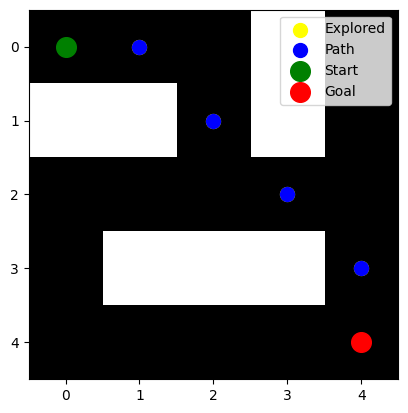

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import math

# Define movement directions (8 directions: horizontal, vertical, diagonal)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

# Euclidean distance heuristic
def euclidean_distance(current, goal):
    return math.sqrt((current[0] - goal[0])**2 + (current[1] - goal[1])**2)

# Greedy Best-First Search (GBFS) algorithm
def gbfs(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    priority_queue = []
    heapq.heappush(priority_queue, (euclidean_distance(start, goal), start))

    came_from = {start: None}  # Track the path
    visited = set()

    while priority_queue:
        _, current = heapq.heappop(priority_queue)

        if current in visited:
            continue
        visited.add(current)

        # If goal is reached, reconstruct the path
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1], visited

        # Explore neighbors
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:  # Check grid boundaries
                if grid[neighbor[0]][neighbor[1]] == 0 and neighbor not in visited:  # Check if traversable
                    heapq.heappush(priority_queue, (euclidean_distance(neighbor, goal), neighbor))
                    came_from[neighbor] = current

    return None, visited  # No path found

# Visualize the grid, obstacles, explored nodes, and the final path
def visualize(grid, path, visited, start, goal):
    grid = np.array(grid)

    # Plot the grid
    plt.imshow(grid, cmap='gray', origin='upper')

    # Mark the explored nodes
    label_visited = False  # Ensure the label 'Explored' appears only once
    for node in visited:
        if not label_visited:
            plt.scatter(node[1], node[0], c='yellow', s=100, label='Explored')
            label_visited = True
        else:
            plt.scatter(node[1], node[0], c='yellow', s=100)

    # Mark the path
    if path:
        label_path = False  # Ensure the label 'Path' appears only once
        for node in path:
            if not label_path:
                plt.scatter(node[1], node[0], c='blue', s=100, label='Path')
                label_path = True
            else:
                plt.scatter(node[1], node[0], c='blue', s=100)

    # Mark the start and goal
    plt.scatter(start[1], start[0], c='green', s=200, label='Start')
    plt.scatter(goal[1], goal[0], c='red', s=200, label='Goal')

    # Display the legend
    plt.legend()
    plt.show()

# Example grid (0 = free space, 1 = obstacle)
grid = [
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)  # Starting coordinates
goal = (4, 4)   # Goal coordinates

# Find the path using GBFS
path, visited = gbfs(grid, start, goal)

# Visualize the results
visualize(grid, path, visited, start, goal)


In [ ]:
!pip install nbconvert AI ASSIGNMENT.ipynb

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [48]:
!jupyter nbconvert --to pdf AI ASSIGNMENT.ipynb

[NbConvertApp] WARNING | pattern 'AI' matched no files
[NbConvertApp] WARNING | pattern 'ASSIGNMENT.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equiv